In [4]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
trainxfile = "TrainX.csv"
trainyfile = "TrainY.csv"
testfile1x = "Test1000set1X.csv"
testfile1y = "Test1000set1Y.csv"
testfile2x = "Test1000set2X.csv"
testfile2y = "Test1000set2Y.csv"
predictionfile = "predictions_ant.csv"
lossfile = "loss_ant.csv"
val_lossfile = "val_loss_ant.csv"
final_errors_file = "final_errors_.csv"

In [6]:
raw_dataset = pd.read_csv(trainyfile, header=None)
trainy = raw_dataset.copy()
print(trainy.shape)

(100000, 240)


In [7]:
raw_dataset = pd.read_csv(trainxfile, header=None)
trainx = raw_dataset.copy()
print(trainx.shape)

(100000, 200)


In [8]:
raw_testset = pd.read_csv(testfile1x, header=None)
testx = raw_testset.copy()
raw_testset = pd.read_csv(testfile1y, header=None)
testy = raw_testset.copy()
print(testx.shape,testy.shape)

(1000, 200) (1000, 240)


In [9]:
raw_testset2 = pd.read_csv(testfile2x, header=None)
val_testx = raw_testset2.copy()
raw_testset2 = pd.read_csv(testfile2y, header=None)
val_testy = raw_testset2.copy()

In [10]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [11]:
train_stats = trainx.describe()

In [12]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
0,100000.0,-194.274010,58.575766,-353.4600,-237.560000,-201.6600,-158.770000,11.122
1,100000.0,54.357527,46.371441,-92.2980,20.187500,57.2875,88.867250,218.950
2,100000.0,-19.891523,30.933233,-125.4500,-40.959000,-16.8400,2.430025,112.520
3,100000.0,27.769207,36.421144,-39.6010,3.401100,17.5015,42.456000,222.730
4,100000.0,117.620423,78.416403,-113.9300,62.179500,122.3900,173.890000,417.110
...,...,...,...,...,...,...,...,...
195,100000.0,116.359255,17.202735,56.9080,105.330000,116.7700,127.310000,184.060
196,100000.0,18.205264,13.288114,-1.4348,8.618675,15.0785,24.299250,120.620
197,100000.0,22.455034,19.526936,-13.4500,6.942125,18.5685,34.524250,100.560
198,100000.0,-132.720753,18.188852,-216.2100,-143.290000,-129.3000,-118.900000,-98.047


In [13]:
normed_train_data = norm(trainx)
normed_test_data = norm(testx)
normed_val_data = norm(val_testx)

In [14]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate

In [15]:
visible = Input(shape=(len(trainx.keys()),))
hidden1 = Dense(256, activation='relu')(visible)
hidden2 = Dense(256, activation='relu')(hidden1)
hidden3 = Dense(256, activation='relu')(hidden2)
merge = concatenate([hidden3, visible])
hidden4 = Dense(256, activation='relu')(merge)
outlar = Dense(240)(hidden4)
model = Model(inputs=visible, outputs=outlar)
print("Model is ready!")

Model is ready!


In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          51456       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          65792       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       dense_1[0][0]                    
_______________________________________________________________________________________

In [17]:
model.compile(optimizer='adamax', loss=['mse'])

In [18]:
EPOCHS = 200
history = model.fit(
  normed_train_data, (trainy-1.0)/3.0,
  epochs=EPOCHS, validation_data = (normed_val_data,(val_testy-1.0)/3.0), verbose=1)

Epoch 1/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0294 - val_loss: 0.0214
Epoch 2/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0191 - val_loss: 0.0179
Epoch 3/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0163 - val_loss: 0.0155
Epoch 4/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0147 - val_loss: 0.0137
Epoch 5/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0136 - val_loss: 0.0127
Epoch 6/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0128 - val_loss: 0.0120
Epoch 7/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0121 - val_loss: 0.0116
Epoch 8/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 9/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 10/200
3125/3125 [==============================] - 6s 2ms/step - l

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.005391,0.005247,195
196,0.005373,0.005160,196
197,0.005384,0.005179,197
198,0.005365,0.005473,198
199,0.005377,0.005180,199


In [20]:
normed_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.237831e-14,2.227156e-14,4.966881e-15,-7.734985e-15,2.467650e-14,3.226104e-14,-4.966881e-15,7.734985e-15,-2.269918e-14,-1.563460e-16,5.687153e-15,-3.538892e-15,8.679311e-15,-1.300622e-14,1.127906e-14,-4.683084e-14,-8.679311e-15,1.300622e-14,-2.320217e-14,2.032656e-14,7.627374e-15,3.964809e-15,1.182678e-14,7.073635e-15,-6.908429e-15,-1.387434e-14,-1.182678e-14,-7.073635e-15,1.396091e-15,6.047781e-14,-2.062485e-14,-4.715173e-16,-7.118685e-15,-1.860512e-15,-1.322595e-15,1.524439e-14,7.118685e-15,1.860512e-15,9.330317e-16,-5.677360e-15,...,-1.775319e-14,3.957286e-14,2.012728e-15,8.037258e-15,2.086021e-14,2.764786e-14,-2.012728e-15,-8.037258e-15,-4.910303e-14,-4.012906e-14,8.402406e-14,4.292895e-14,-7.992911e-15,-1.237292e-14,-3.863313e-14,-1.353072e-13,7.992911e-15,1.237292e-14,-4.229638e-14,7.291124e-14,-1.809688e-14,1.880327e-14,-1.364140e-15,-8.587625e-15,6.721992e-15,4.583521e-14,1.364140e-15,8.587625e-15,-1.996197e-14,1.241928e-15,-8.680225e-14,-6.329832e-14,9.559403e-16,1.326519e-14,-1.878929e-15,7.334413e-14,-9.559403e-16,-1.326519e-14,4.916573e-14,6.937768e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.717608e+00,-3.162626e+00,-3.412462e+00,-1.849755e+00,-2.952831e+00,-3.637902e+00,-4.280559e+00,-5.352956e+00,-1.363935e+00,-4.054123e+00,-2.505723e+00,-2.998971e+00,-3.736237e+00,-1.964934e+00,-2.933793e+00,-3.647740e+00,-3.245273e+00,-6.211908e+00,-1.314186e+00,-2.594779e+00,-2.304012e+00,-2.982106e+00,-3.776086e+00,-2.130369e+00,-2.877840e+00,-3.597551e+00,-2.388775e+00,-6.443685e+00,-1.310534e+00,-1.890620e+00,-2.281672e+00,-2.947810e+00,-4.210718e+00,-2.143041e+00,-2.752013e+00,-3.513930e+00,-1.948655e+00,-6.980098e+00,-1.3

In [21]:
test_predictions = model.predict(normed_test_data).flatten()
cc = 3.0*test_predictions.reshape(1000,240)+1.0
np.savetxt(predictionfile, cc, delimiter=",")
relative_error = (testy-cc)/testy
werr = np.power(np.sum(np.power(relative_error,2), axis=0)/1000,0.5)
#np.flip(werr.values)

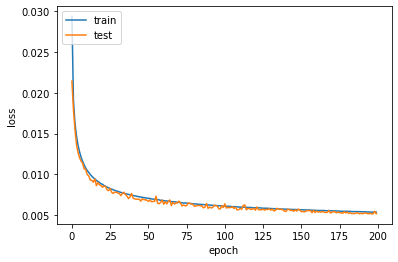

In [23]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
np.savetxt(lossfile, history.history['loss'], delimiter=",")
np.savetxt(val_lossfile, history.history['val_loss'], delimiter=",")

In [25]:
np.savetxt(final_errors_file, werr.values, delimiter=",")

In [32]:
mse = (np.square(testy - cc)).mean(axis=None)
mse.mean()

0.0465243412679098